In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
%%bash

### create matrix for H3K79me2 on a 3kb window downstream of TSS 

computeMatrix scale-regions -R ../INPUT_DATA/3kb_DownTSS_ProteinCoding.bed \
-S /data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/deepTools_ChIP/bamCompare/mESC_DMSO_rep1_H3K79me2_merged.filtered.log2ratio.over_mESC_DMSO_rep1_Input.bw \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/deepTools_ChIP/bamCompare/mESC_DMSO_rep2_H3K79me2_merged.filtered.log2ratio.over_mESC_DMSO_rep2_Input.bw \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/deepTools_ChIP/bamCompare/iNPC_DMSO_rep1_H3K79me2_merged.filtered.log2ratio.over_iNPC_DMSO_rep1_Input.bw \
/data/manke/group/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/deepTools_ChIP/bamCompare/iNPC_DMSO_rep2_H3K79me2_merged.filtered.log2ratio.over_iNPC_DMSO_rep2_Input.bw \
-o ../INTERMEDIATE_FILES/H3K79me2_3kbDownTSS_mESC_NPC48h.mat.gz --missingDataAsZero \
--blackListFileName /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
--samplesLabel mESC_1 mESC_2 NPC48h_1 NPC48h_2 -p 20


Skipping ENSMUSG00000075015.3, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000075014.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000091028.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000096385.7, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000096519.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000074564.3, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000095547.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000095186.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000095891.7, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000096736.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000096201.1, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000023764.18, due to being absent in the computeMatrix output.
Skipping ENSMUSG00000095280.1, due to b

In [11]:
%%bash

### plot heatmap

plotHeatmap -m ../INTERMEDIATE_FILES/H3K79me2_3kbDownTSS_mESC_NPC48h.mat.gz -o ../FIGURES/H3K79me2_3kbDownTSS_mESC_NPC48h.png \
--outFileSortedRegions ../INTERMEDIATE_FILES/H3K79me2_3kbDownTSS_mESC_NPC48h_5cl.txt --kmeans 5 --colorMap "RdBu_r" --endLabel "3kb" \
--yMax 3

/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



In [4]:
### CREATE DICTIONARY LINKING COORDINATES TO GENE ID 

dic_regions = pd.read_csv("../INPUT_DATA/3kb_DownTSS_ProteinCoding.bed", sep="\t", header=None, names=["chr","start","end","ID","sc","strand","symbol","length"])
dic_regions.index = ["{}_{}_{}".format(dic_regions.chr[i], dic_regions.start[i], dic_regions.end[i]) for i in range(dic_regions.shape[0])]
dic_regions = dic_regions["ID"].to_dict()
dic_regions

{'1_3668498_3671498': 'ENSMUSG00000051951.5',
 '1_4406241_4409241': 'ENSMUSG00000025900.12',
 '1_4494354_4497354': 'ENSMUSG00000025902.13',
 '1_4782739_4785739': 'ENSMUSG00000033845.13',
 '1_4807788_4810788': 'ENSMUSG00000025903.14',
 '1_4807892_4810892': 'ENSMUSG00000104217.1',
 '1_4857814_4860814': 'ENSMUSG00000033813.15',
 '1_5067285_5070285': 'ENSMUSG00000002459.17',
 '1_5070018_5073018': 'ENSMUSG00000033793.12',
 '1_5588466_5591466': 'ENSMUSG00000025905.13',
 '1_5914398_5917398': 'ENSMUSG00000033774.4',
 '1_6206197_6209197': 'ENSMUSG00000025907.14',
 '1_6359218_6362218': 'ENSMUSG00000087247.3',
 '1_6487231_6490231': 'ENSMUSG00000033740.17',
 '1_7088920_7091920': 'ENSMUSG00000051285.17',
 '1_9296878_9299878': 'ENSMUSG00000025909.16',
 '1_9545408_9547455': 'ENSMUSG00000061024.8',
 '1_9547948_9550948': 'ENSMUSG00000025911.14',
 '1_9601199_9604199': 'ENSMUSG00000067879.3',
 '1_9697209_9700209': 'ENSMUSG00000025912.16',
 '1_9745382_9748382': 'ENSMUSG00000045210.8',
 '1_9798107_9801107'

In [5]:
### CREATE DICTIONARY LINKING GENE ID TO CLUSTERS 

cl = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_3kbDownTSS_mESC_NPC48h_5cl.txt",sep="\t")
# cl.index = ["{}_{}_{}".format(cl["#chrom"][i], cl.start[i], cl.end[i]) for i in range(cl.shape[0])]
cl.index = cl.name
cl = cl["deepTools_group"].to_dict()
cl

{'ENSMUSG00000042699.11': 'cluster_1',
 'ENSMUSG00000071172.12': 'cluster_1',
 'ENSMUSG00000024811.11': 'cluster_1',
 'ENSMUSG00000041328.16': 'cluster_1',
 'ENSMUSG00000026020.9': 'cluster_1',
 'ENSMUSG00000028291.7': 'cluster_1',
 'ENSMUSG00000060373.15': 'cluster_1',
 'ENSMUSG00000026349.14': 'cluster_1',
 'ENSMUSG00000028820.13': 'cluster_1',
 'ENSMUSG00000002477.4': 'cluster_1',
 'ENSMUSG00000062270.14': 'cluster_1',
 'ENSMUSG00000024498.15': 'cluster_1',
 'ENSMUSG00000017421.18': 'cluster_1',
 'ENSMUSG00000022234.15': 'cluster_1',
 'ENSMUSG00000020349.4': 'cluster_1',
 'ENSMUSG00000029169.11': 'cluster_1',
 'ENSMUSG00000074480.4': 'cluster_1',
 'ENSMUSG00000005371.14': 'cluster_1',
 'ENSMUSG00000074643.12': 'cluster_1',
 'ENSMUSG00000026238.14': 'cluster_1',
 'ENSMUSG00000004364.14': 'cluster_1',
 'ENSMUSG00000049878.13': 'cluster_1',
 'ENSMUSG00000089824.10': 'cluster_1',
 'ENSMUSG00000029817.11': 'cluster_1',
 'ENSMUSG00000018583.5': 'cluster_1',
 'ENSMUSG00000039100.10': 'clus

In [6]:
mark="H3K79me2"
# bed="../DATA/3kb_DownTSS_ProteinCoding.bed"

counts_k79me2 = pd.read_csv("../INTERMEDIATE_FILES/{}_NPC48h_vs_mESC.counts".format(mark),
                     sep="\t",header=0, 
                     names=["chr","start","end",
                            "ESC_DMSO_1","ESC_DMSO_2","ESC_EPZ_1","ESC_EPZ_2",
                            "NPC48h_DMSO_1","NPC48h_DMSO_2","NPC48h_EPZ_1","NPC48h_EPZ_2",
                            "ESC_DMSO_1_INP","ESC_DMSO_2_INP","ESC_EPZ_1_INP","ESC_EPZ_2_INP",
                            "NPC48h_DMSO_1_INP","NPC48h_DMSO_2_INP","NPC48h_EPZ_1_INP","NPC48h_EPZ_2_INP"])

c_k79me2 = rel.preprocess_deeptools(counts_k79me2, merge_rep=True, list_of_columns=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]])

normT_k79me2 = rel.Normalize_T(c_k79me2)

/home/ferrari/.local/lib/python3.6/site-packages/RELACS.py:100: RuntimeWarning: divide by zero encountered in log2
  counts_norm[list(counts_norm)[:n_]] = np.log2(counts_norm[list(counts_norm)[:n_]].divide(counts_norm[list(counts_norm)[n_:]].values))


2.061400544664143


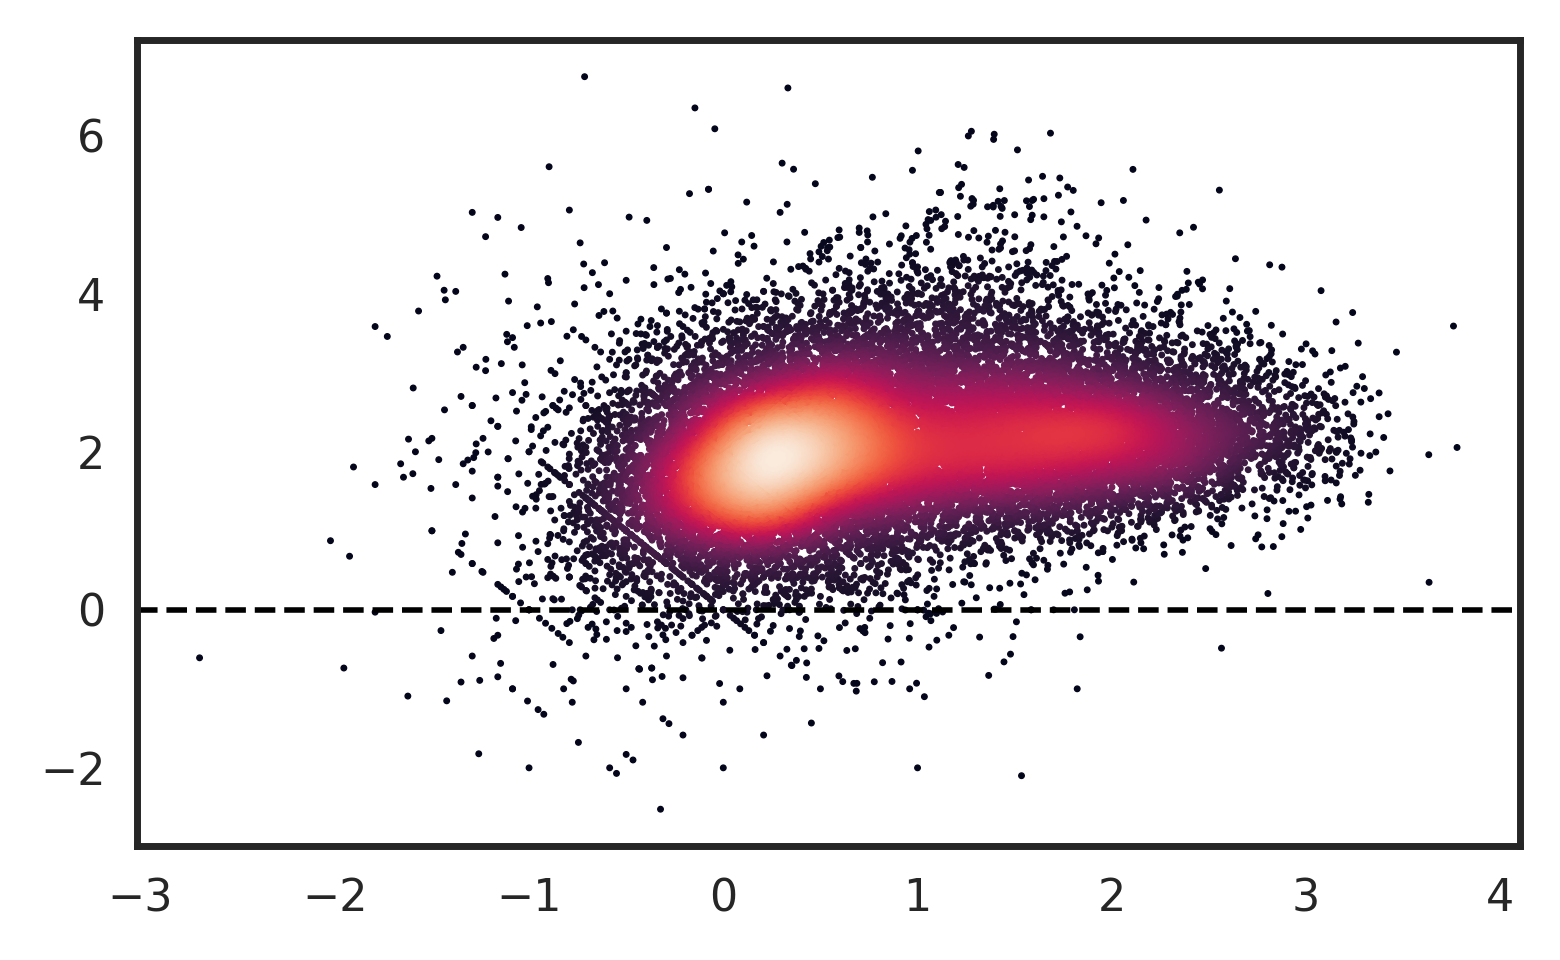

In [7]:
### COMPUTE H3K79me2 LOG2FC 
reg=False
H3K79me2, lfc_K79me2, cov_K79me2 = rel.MA_samp(normT_k79me2, ["ESC_DMSO_1+ESC_DMSO_2","NPC48h_DMSO_1+NPC48h_DMSO_2"], reg=reg)

In [8]:
ann_cl = pd.concat([lfc_K79me2,cov_K79me2], axis=1)
ann_cl["clust"] = [cl[dic_regions[k]] for k in ann_cl.index]
ann_cl

,0,1,clust
2_32448445_32451445,2.067928,2.179815,cluster_2
2_32450457_32453457,1.741290,1.038590,cluster_4
6_89707540_89710540,1.502500,0.014285,cluster_5
6_89740766_89743766,1.807355,-0.096323,cluster_5
15_43167826_43170826,2.016781,-0.912175,cluster_5
...,...,...,...
14_57743103_57746103,3.676135,1.546301,cluster_3
14_57755388_57758388,2.835924,0.447108,cluster_5
14_57798180_57801180,2.269465,2.405836,cluster_1
16_48991165_48994165,2.731151,2.056148,cluster_1


In [9]:
exp = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_withLFCthr1_mESCvsNPC48h.tsv", sep="\t")
exp["clust"] = [cl[i] if i in cl else np.nan for i in exp.index]
exp.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,clust
ENSMUSG00000030000.10,12132.499831,10.257794,0.288306,32.111017,3.094332e-226,7.859913e-222,Add2,cluster_3
ENSMUSG00000042453.14,23676.833785,9.312579,0.271404,30.628080,5.176430e-206,6.574326e-202,Reln,cluster_3
ENSMUSG00000050334.12,8336.290111,10.088751,0.327659,27.738461,2.400982e-169,2.032911e-165,RP23-88A13.2,NaN
ENSMUSG00000031285.14,75535.737954,15.467268,0.541438,26.720094,2.749871e-157,1.746237e-153,Dcx,cluster_3
ENSMUSG00000054423.14,9896.137248,9.718850,0.326708,26.686975,6.667025e-157,3.386982e-153,Cadps,cluster_3


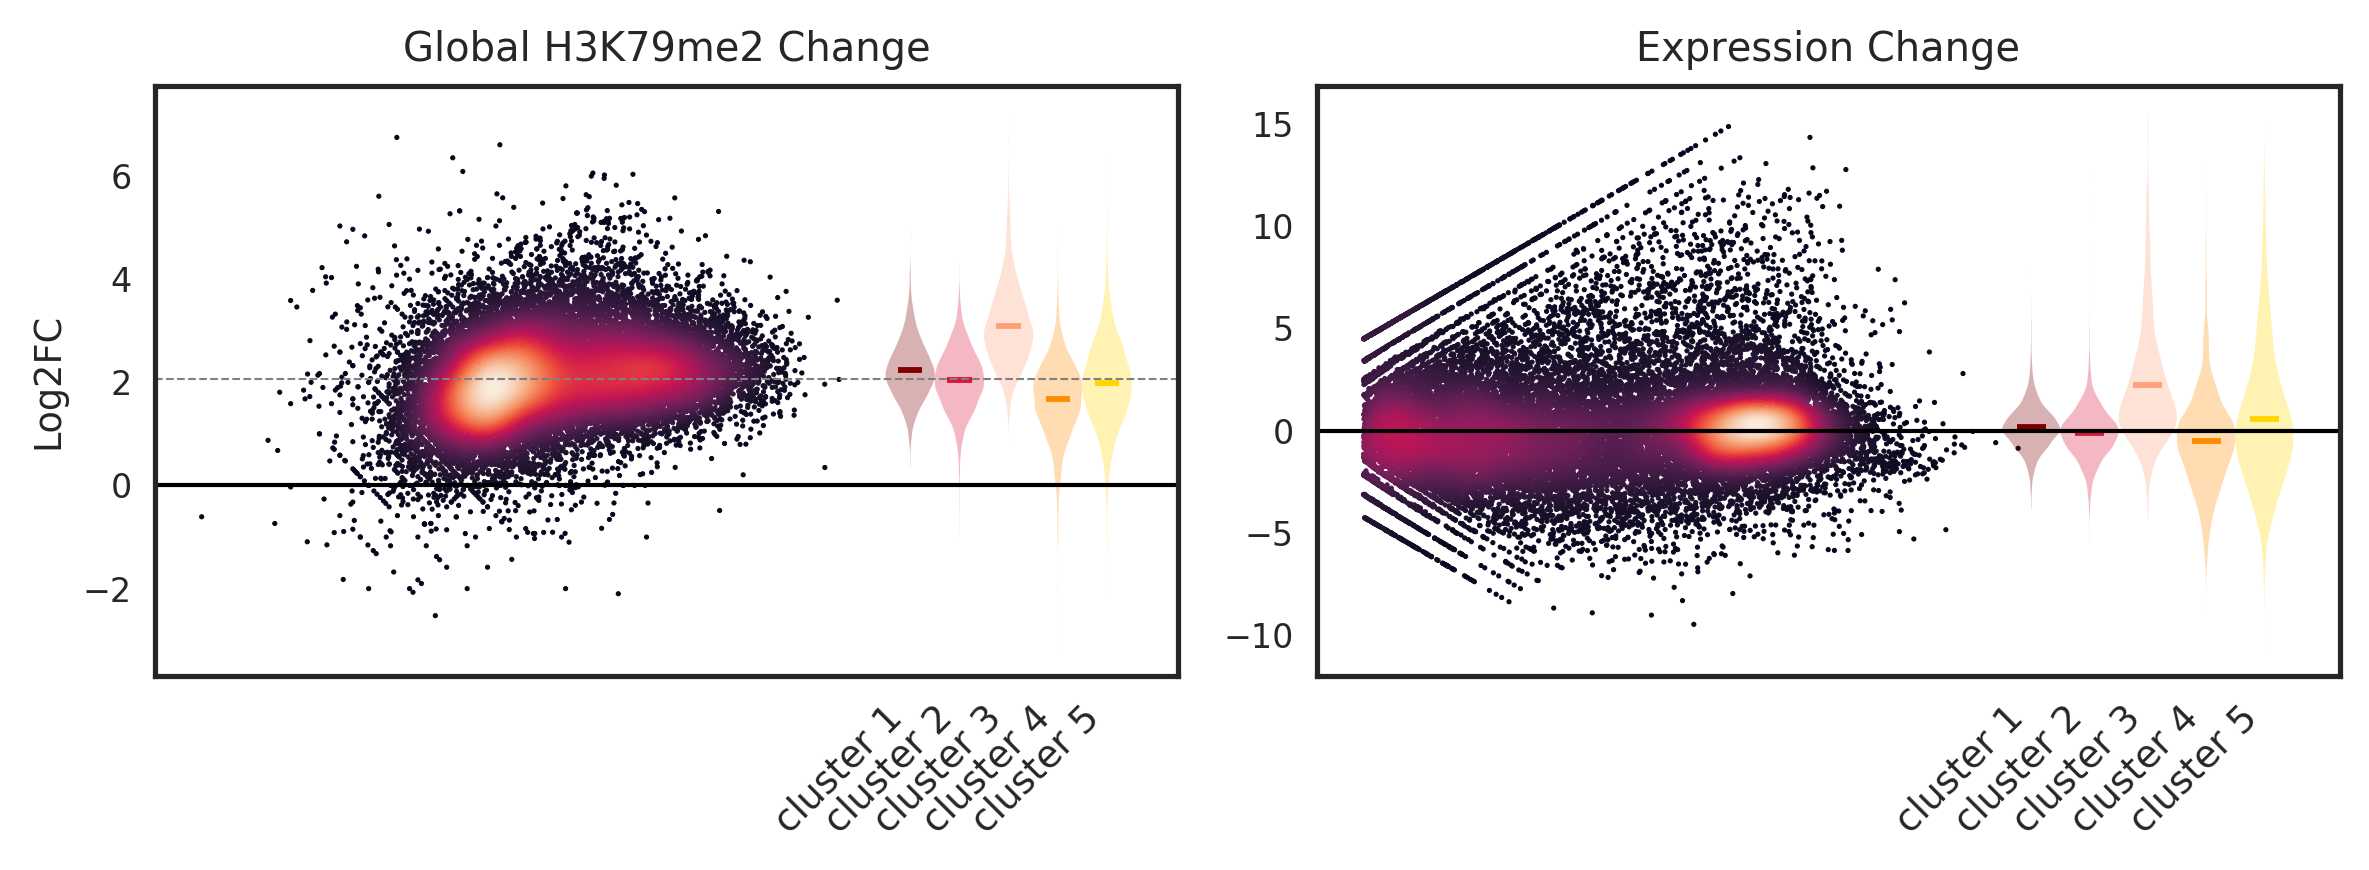

In [10]:
fig,ax = plt.subplots(1,2,figsize=(8,3), dpi=300)
rel.density_scatter(ann_cl[1],ann_cl[0], ax =ax[0])
A = ax[0].violinplot(ann_cl.loc[ann_cl.clust == "cluster_1"][0],[4.5], showmeans=True, showextrema=False)
A["bodies"][0].set_facecolor("maroon")
A["cmeans"].set_color('maroon')
B = ax[0].violinplot(ann_cl.loc[ann_cl.clust == "cluster_2"][0],[5],showmeans=True, showextrema=False)
B["bodies"][0].set_facecolor("crimson")
B["cmeans"].set_color('crimson')
C = ax[0].violinplot(ann_cl.loc[ann_cl.clust == "cluster_3"][0],[5.5],showmeans=True, showextrema=False)
C["bodies"][0].set_facecolor("lightsalmon")
C["cmeans"].set_color('lightsalmon')
D = ax[0].violinplot(ann_cl.loc[ann_cl.clust == "cluster_4"][0],[6],showmeans=True, showextrema=False)
D["bodies"][0].set_facecolor("darkorange")
D["cmeans"].set_color('darkorange')
E = ax[0].violinplot(ann_cl.loc[ann_cl.clust == "cluster_5"][0],[6.5],showmeans=True, showextrema=False)
E["bodies"][0].set_facecolor("gold")
E["cmeans"].set_color('gold')

ax[0].axhline(np.median(ann_cl[0].values), linestyle="--",color='grey',linewidth=0.5)
ax[0].axhline(0, linestyle="-",color='k',linewidth=1)

ax[0].set_xticks([4.5,5,5.5,6,6.5])
ax[0].set_xticklabels(['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5'], fontsize=9, rotation=45, ha="right")
ax[0].set_ylabel("Log2FC")
ax[0].set_title("Global H3K79me2 Change")

rel.density_scatter(np.log10(exp.baseMean), exp.log2FoldChange, ax=ax[1])
A = ax[1].violinplot(exp.loc[exp.clust == "cluster_1"]["log2FoldChange"],[6], showmeans=True, showextrema=False)
A["bodies"][0].set_facecolor("maroon")
A["cmeans"].set_color('maroon')
B = ax[1].violinplot(exp.loc[exp.clust == "cluster_2"]["log2FoldChange"],[6.5],showmeans=True, showextrema=False)
B["bodies"][0].set_facecolor("crimson")
B["cmeans"].set_color('crimson')
C = ax[1].violinplot(exp.loc[exp.clust == "cluster_3"]["log2FoldChange"],[7],showmeans=True, showextrema=False)
C["bodies"][0].set_facecolor("lightsalmon")
C["cmeans"].set_color('lightsalmon')
D = ax[1].violinplot(exp.loc[exp.clust == "cluster_4"]["log2FoldChange"],[7.5],showmeans=True, showextrema=False)
D["bodies"][0].set_facecolor("darkorange")
D["cmeans"].set_color('darkorange')
E = ax[1].violinplot(exp.loc[exp.clust == "cluster_5"]["log2FoldChange"],[8],showmeans=True, showextrema=False)
E["bodies"][0].set_facecolor("gold")
E["cmeans"].set_color('gold')

ax[1].axhline(0, linestyle="-",color='k',linewidth=1)
ax[1].set_xticks([6,6.5,7,7.5,8])
ax[1].set_xticklabels(['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5'], fontsize=9, rotation=45, ha="right")
# ax[1].set_ylabel("Log2FC")
ax[1].set_title("Expression Change")
plt.tight_layout()

plt.savefig("../FIGURES/MA-plot_H3K79me2-Expression_5clusters.png")

In [11]:
gene_cl = exp["clust"]
gene_cl.index = [i.strip().split(".")[0] for i in gene_cl.index]
gene_cl

ENSMUSG00000030000    cluster_3
ENSMUSG00000042453    cluster_3
ENSMUSG00000050334          NaN
ENSMUSG00000031285    cluster_3
ENSMUSG00000054423    cluster_3
                        ...    
ENSMUSG00000116887          NaN
ENSMUSG00000116888          NaN
ENSMUSG00000116900          NaN
ENSMUSG00000116902          NaN
ENSMUSG00000116941          NaN
Name: clust, Length: 26442, dtype: object

In [12]:
%%R -i gene_cl

### GO ENRICHMENT ANALYSIS
library(clusterProfiler)
library(org.Mm.eg.db)

cl_1 = names(gene_cl[gene_cl == "cluster_1"])
cl_2 = names(gene_cl[gene_cl == "cluster_2"])
cl_3 = names(gene_cl[gene_cl == "cluster_3"])
cl_4 = names(gene_cl[gene_cl == "cluster_4"])
cl_5 = names(gene_cl[gene_cl == "cluster_5"])


eg_1 = bitr(cl_1, fromType="ENSEMBL", toType=c("ENTREZID","ENSEMBL","SYMBOL"), OrgDb="org.Mm.eg.db")
eg_2 = bitr(cl_2, fromType="ENSEMBL", toType=c("ENTREZID","ENSEMBL","SYMBOL"), OrgDb="org.Mm.eg.db")
eg_3 = bitr(cl_3, fromType="ENSEMBL", toType=c("ENTREZID","ENSEMBL","SYMBOL"), OrgDb="org.Mm.eg.db")
eg_4 = bitr(cl_4, fromType="ENSEMBL", toType=c("ENTREZID","ENSEMBL","SYMBOL"), OrgDb="org.Mm.eg.db")
eg_5 = bitr(cl_5, fromType="ENSEMBL", toType=c("ENTREZID","ENSEMBL","SYMBOL"), OrgDb="org.Mm.eg.db")


list_genes = list(cl_1 = eg_1$ENTREZID, 
                  cl_2 = eg_2$ENTREZID, 
                  cl_3 = eg_3$ENTREZID, 
                  cl_4 = eg_4$ENTREZID, 
                  cl_5 = eg_5$ENTREZID)


ck <- compareCluster(geneCluster = list_genes, 
                     fun = "enrichGO", 
                     OrgDb="org.Mm.eg.db", 
                     ont="BP",
                     pAdjustMethod = "BH",
                     pvalueCutoff  = 0.01,
                     qvalueCutoff  = 0.05,
                     readable      = TRUE)


/home/ferrari/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/home/ferrari/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: clusterProfiler v3.10.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

  warnings.warn(x, RRuntimeWarning)
/home/ferrari/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: AnnotationDbi

  warnings.warn(x, RRuntimeWarning)
/home/ferrari/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/ferrari/.local/lib/pyt

In [37]:
%%R

write.table(as.data.frame(ck), "../INTERMEDIATE_FILES/GO_ENRICHMENT_H3K79me2_3kbDownTSS_CLUSTERS.tsv", sep="\t",quote=F)

pdf("../FIGURES/GO_ENRICHMENT_H3K79me2_3kbDownTSS_CLUSTERS.pdf",width=9, height=5)
d = dotplot(ck)
print(d)
dev.off()

png 
  2 
